In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [2]:
#Loading numpy zip
data =np.load('model/data_100_100_norm.npz')
data

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
x = data['arr_0']#independent feature
y=data['arr_1']#dependent feature
x.shape,y.shape

((5456, 10000), (5456,))

# Eigen Image :
#### If you use PCA to reduce dimensions such images are called eigen images

In [29]:
x1 = x-x.mean(axis=0)
x1[5455]

array([-0.35431689, -0.35465614, -0.35482146, ..., -0.02179576,
       -0.02254471, -0.01304482])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=None,whiten = True)

In [8]:
x_pca = pca.fit_transform(x1)

In [9]:
x_pca.shape 

(5456, 5456)

In [10]:
eigen_ratio = pca.explained_variance_ratio_

eigen_ratio_cum = np.cumsum(eigen_ratio)

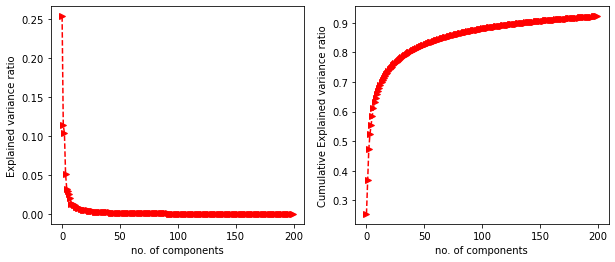

In [22]:
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explained variance ratio')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained variance ratio')
plt.show()


In [12]:
#using elbow method, consider no. of components  is b/w 25-30
#>since i consider component b/w  25 to 30 the explained variance is around 75%
#In order to get min 80% variance i am considering  50 components

In [30]:
pca_50 = PCA(n_components=50,whiten = True)
x_pca_50 = pca_50.fit_transform(x1)#INPUTTING MEAN DATA FOR EIGEN IMAGE

In [14]:
x_pca_50.shape

(5456, 50)

In [15]:
import pickle

In [17]:
pickle.dump(pca_50,open('model/pca_50.pickle','wb'))

In [18]:
#consider 50 components and inverse transform it
x_pca_inv = pca_50.inverse_transform(x_pca_50)
x_pca_inv.shape

(5456, 10000)

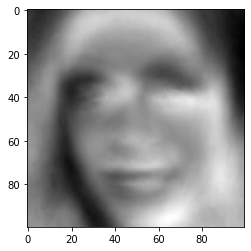

In [24]:
eig_img = x_pca_inv[2,:]
eig_img = eig_img.reshape(100,100)
plt.imshow(eig_img,cmap = 'gray')

In [20]:
np.savez('model/data_pca_50_y_mean_.pickle',x_pca_50,y,x.mean(axis=0))